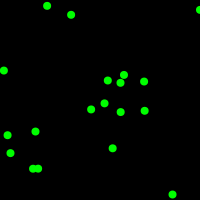

KeyboardInterrupt: 

In [192]:
import drawSvg as draw
import math
import random

window_height = 200
window_width = 200
ball_count = 20
ball_size = 4
x = []
y = []
vx = []
vy = []
timestep = 1


def generate_positions(): # used to populate the x, y, vx, and vy lists with random values
    for i in range(0,ball_count): #iterates for the number of balls we're using in the simulation
        x.extend([random.randint(1,window_width)])
        y.extend([random.randint(1,window_height)])
        vx.extend([random.uniform(-5,5)])
        vy.extend([random.uniform(-5,5)])
    
def update_position(i):
    
    x[i] = x[i] + timestep*vx[i]
    y[i] = y[i] + timestep*vy[i]    
    cross_list = [] #list used to hold list of what indexes are matching (to see if balls are at the same location/"colliding")
    
    for l in range(len(x)): #tests list to see if there's overlap between balls
        if int(x[l]) >= int(x[i] - ball_size) and int(x[l]) <= int(x[i] + ball_size) and int(y[l]) >= int(y[i] - ball_size) and int(y[l]) <= int(y[i] + ball_size):
            cross_list.append(l) #pulls index numbers of elements in x that match our value. There should always be at least 1 in since we just set it 
    if len(cross_list) > 1: #checks if the cross_list is bigger than one (i.e there are several balls that share x and y coordinates) 
        for i in cross_list: # changes velocities and positions 
            vx[i] *= -1
            x[i] = x[i] + timestep*vx[i]
            vy[i] *= -1
            y[i] = y[i] + timestep*vy[i]

    if x[i] >= window_width or x[i] <= 0: #checks if a circle hits the left or right wall
        vx[i] *= -1
        x[i] = x[i] + timestep*vx[i]
    if y[i] >= window_height or y[i] <= 0: #checks if a circle hits the top or bottom wall
        vy[i] *= -1
        y[i] = y[i] + timestep*vy[i]
    
    
    
def draw_ball(i):
    d.append(draw.Circle(x[i], y[i], ball_size, fill='lime'))
    return d

def draw_frame():
    for i in range(0,ball_count):
        update_position(i)
        draw_ball(i)
    return d

generate_positions() # creates the x,y,vx,vy positions

with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
    while(True):
        d = draw.Drawing(window_width, window_height, origin=(0,0) ) # erase canvas
        d.append(draw.Rectangle(0,0,window_width,window_height, fill='black'))
        anim.draw_frame() #it's showtime
    